# Python basics

Vom trece rapid prin concepte de Python

In [1]:
print("Hello World")

Hello World


In [2]:
i = 10
print(i)
i = "Un string!"
print(i)

10
Un string!


In [3]:
# Indentari:
for i in [1, 2, 3, 4, 5]:
    print(f"I este {i}")

I este 1
I este 2
I este 3
I este 4
I este 5


## Clase si obiecte. Mosternire

In [4]:
# Clase si obiecte
# Definirea unei clase numite Animal
class Animal:
    # Constructorul clasei, apelat atunci cand se creeaza un nou obiect
    def __init__(self, nume, specie):
        self.nume = nume  # Atribut al clasei
        self.specie = specie  # Atribut al clasei

    # Metoda de afisare a detaliilor obiectului
    def arata_detalii(self):
        print(f"Sunt un {self.specie} si ma numesc {self.nume}.")

# Definirea unei subclase (clasa derivata) care mosteneste clasa Animal
class Caine(Animal):
    # Constructor specific pentru Caine
    def __init__(self, nume, rasa):
        super().__init__(nume, "caine")  # Apelul constructorului din clasa parinte
        self.rasa = rasa  # Atribut nou adaugat pentru subclasa

    # Suprascrierea metodei arata_detalii pentru a include rasa
    def arata_detalii(self):
        print(f"Sunt un {self.specie}, rasa {self.rasa} si ma numesc {self.nume}.")

In [5]:
# Instantierea a doua obiecte de tip Animal
animal1 = Animal("Leo", "leu")
animal2 = Animal("Rex", "tiranozaur")

# Apelarea metodei arata_detalii pentru fiecare obiect Animal
animal1.arata_detalii()
animal2.arata_detalii()

# Instantierea unui obiect de tip Caine
caine1 = Caine("Max", "Labrador")

# Apelarea metodei arata_detalii pentru obiectul Caine
caine1.arata_detalii()

Sunt un leu si ma numesc Leo.
Sunt un tiranozaur si ma numesc Rex.
Sunt un caine, rasa Labrador si ma numesc Max.


## Functii si parametri

In [6]:
# Importam modulul pentru expresii regulate
import re

# Definim functia cu parametru implicit
def calculeaza_frecventa(text, cuvinte_de_ignorat=None):
    """
    Calculeaza frecventa cuvintelor dintr-un text.
    
    :param text: String, textul in care sa se calculeze frecventa cuvintelor
    :param cuvinte_de_ignorat: List, lista de cuvinte care vor fi ignorate in calculul frecventei
    :return: Un dictionar cu cuvinte ca si chei si frecventa lor ca si valori
    """
    # Daca nu se ofera o lista de cuvinte de ignorat, initializam una goala
    if cuvinte_de_ignorat is None:
        cuvinte_de_ignorat = []

    # Curatam textul de semne de punctuatie si il transformam in litere mici
    text_curatat = re.sub(r'[^\w\s]', '', text).lower()
    
    # Separam textul in cuvinte
    cuvinte = text_curatat.split()
    
    # Initializam un dictionar pentru a tine evidenta frecventelor
    frecvente = {}
    
    # Calculam frecventa pentru fiecare cuvant
    for cuvant in cuvinte:
        if cuvant not in cuvinte_de_ignorat:
            if cuvant in frecvente:
                frecvente[cuvant] += 1
            else:
                frecvente[cuvant] = 1
                
    return frecvente

# Apelul functiei prin pozitie
text_de_analizat = "Aceasta este o propoziție. Aceasta este, de asemenea, o propoziție."
frecventa_cuvinte = calculeaza_frecventa(text_de_analizat)
print(frecventa_cuvinte)

# Apelul functiei prin numirea parametrului, specificand cuvinte de ignorat
cuvinte_ignorate = ['aceasta', 'este']
frecventa_cuvinte = calculeaza_frecventa(text=text_de_analizat, cuvinte_de_ignorat=cuvinte_ignorate)
print(frecventa_cuvinte)


{'aceasta': 2, 'este': 2, 'o': 2, 'propoziție': 2, 'de': 1, 'asemenea': 1}
{'o': 2, 'propoziție': 2, 'de': 1, 'asemenea': 1}


## List comprehensions

In [7]:
lista_initiala = ["ana", "are", "mere", "", "pere", " "]
# Parcurgem fiecare element din lista 
# Daca lungimea sirului e mai mare de zero
# Se transforma in litere mari.
lista_transformata = [s.upper() for s in lista_initiala if len(s.strip()) > 0]
print(lista_transformata)


['ANA', 'ARE', 'MERE', 'PERE']


## Jupyter lab powers!

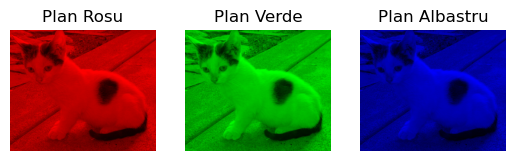

In [8]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

def citeste_imagine(cale_imagine):
    # Citeste imaginea folosind cv2
    imagine = cv2.imread(cale_imagine)
    # OpenCV incarca imaginile in format BGR, le convertim la RGB
    imagine = cv2.cvtColor(imagine, cv2.COLOR_BGR2RGB)
    return imagine

def imparte_in_plane(imagine):
    # Imparte imaginea in plane de culoare
    r, g, b = cv2.split(imagine)
    def expandeaza(plan, index):
        color_p = np.zeros((*imagine.shape[0:2], 3), np.uint8)
        color_p[:, :, index] = plan
        return color_p
    rr = expandeaza(r, 0)
    gg = expandeaza(g, 1)
    bb = expandeaza(b, 2)
    return (rr, gg, bb)

def afiseaza_plane_de_culoare(plane, titlu, ax):
    # Creaza o figura si afiseaza un plan de culoare
    ax.imshow(plane, cmap='gray')
    ax.set_title(titlu)
    ax.axis('off')

def main():
    # Calea catre fisierul imagine
    cale_imagine = '../images/nice_cat.jpg'
    
    # Citeste imaginea
    imagine = citeste_imagine(cale_imagine)
    
    # Imparte imaginea in plane de culoare
    r, g, b = imparte_in_plane(imagine)
    
   
    # Afiseaza planul rosu
    fig, ax = plt.subplots(1, 3)
    afiseaza_plane_de_culoare(r, 'Plan Rosu', ax[0])
    
    # Afiseaza planul verde
    # plt.subplot(1, 3, 2)
    afiseaza_plane_de_culoare(g, 'Plan Verde', ax[1])
    
    # Afiseaza planul albastru
    # plt.subplot(1, 3, 3)
    afiseaza_plane_de_culoare(b, 'Plan Albastru', ax[2])
    
    # Arata figurile
    plt.show()

main()